# Week 1: Pilot data scraping and EDA
For pilot data scraping, see Wk1_praw_scrap_pilot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(1, '../scripts') #add my scripts path
from teamname_stdize import teamname_stdize

In [3]:
ds = pd.read_csv('../data/hot_1000.csv', names = ['user_id', 'team', 'n_posts'], skiprows = 1)

In [4]:
# standardize all team names into 3 letters
ds = teamname_stdize(ds)

In [5]:
print('All team names:')
print(ds.team.unique())

All team names:
['Szczerbiak' 'GSW' 'SAC' 'DEN' 'NBA' 'NONE' '[NBA] Scott Foster' 'ATL'
 'POR' 'NYK' 'OKC' 'Serbia' 'LAL' 'CHI' 'Australia' 'Greece' 'France'
 'LAC' 'ORL' 'TOR' 'SAS' 'PHI' 'DAL' 'DET' 'MIA' 'CLE' 'MIL' 'UTA' 'MIN'
 'WAS' 'PHX' 'BOS' 'Lithuania' 'HOU' 'NOP' 'Germany' 'Spain' 'IND' 'SEA'
 'USA' 'CHA' 'Jordan' 'MEM' 'Montenegro' 'Dominican Republic' 'BKN' 'Iran'
 'Puerto Rico' 'Philippines ' 'Canada' 'West' 'Venezuela' '75' 'Japan'
 'Turkey' 'New Zealand' 'Braves' 'East' 'Czech Republic'
 '[NBA] LeBron James' '24' 'NBA [Matthew Dellavedova]' 'Russia' 'Poland'
 "Côte d'Ivoire" 'r/nba PSBattle Winner' 'Senegal' 'Argentina' 'Angola'
 'Brazil' 'China' 'Huskies' 'South Korea' 'Nigeria' 'Italy' '23'
 '[Puerto Rico] JJ Barea' 'Big Forehead Gang' 'KnickerBockers' 'Tunisia'
 '55']


In [6]:
# load team names
team_names = pd.read_csv('../data/teams', names = ['name', 'abbrs'])
team_abbrs = team_names['abbrs'].to_list()

In [7]:
# assign all other team names as Others
ds['team'] = ds['team'].apply(lambda x: x if x in team_abbrs + ['NONE'] else 'OTHS')

In [8]:
print('Total No. Users:')
print(ds.shape[0])

Total No. Users:
9117


In [9]:
print('No. Users without team:')
print((ds['team'] == 'NONE').sum())

No. Users without team:
3569


In [10]:
# look at labeled data
ds_team = ds.loc[ds['team']!='NONE', :]

In [11]:
# count of fans per team
cnt_fans = ds_team.groupby('team')['user_id'].count().sort_values(ascending=False)

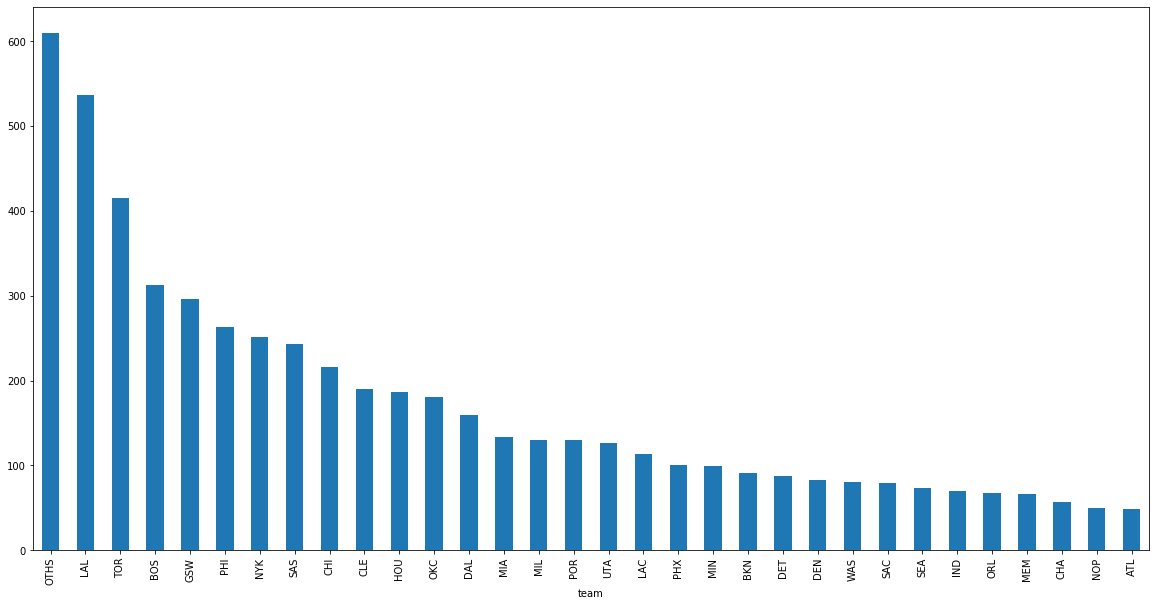

In [12]:
cnt_fans.plot.bar(figsize = (20, 10)) #fans count by team

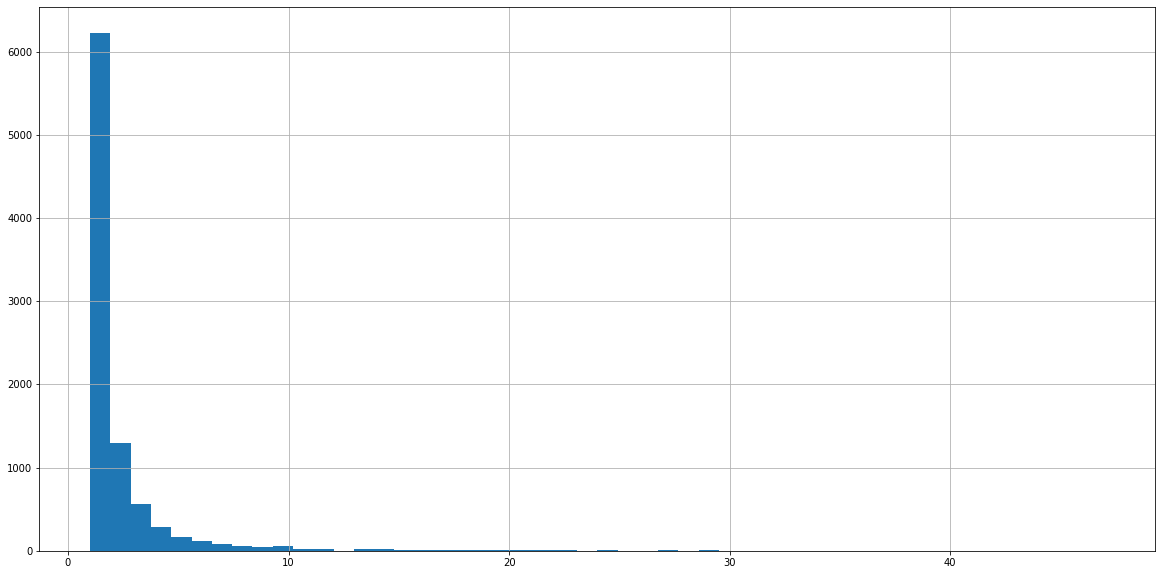

In [13]:
# No. of posts per user
ds.loc[ds['n_posts']<50,'n_posts'].hist(bins = 50, figsize = (20,10))